C:\Users\bikra\AppData\Local\Temp\ipykernel_12316\2494577309.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\bikra\AppData\Local\Temp\ipykernel_12316\2494577309.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

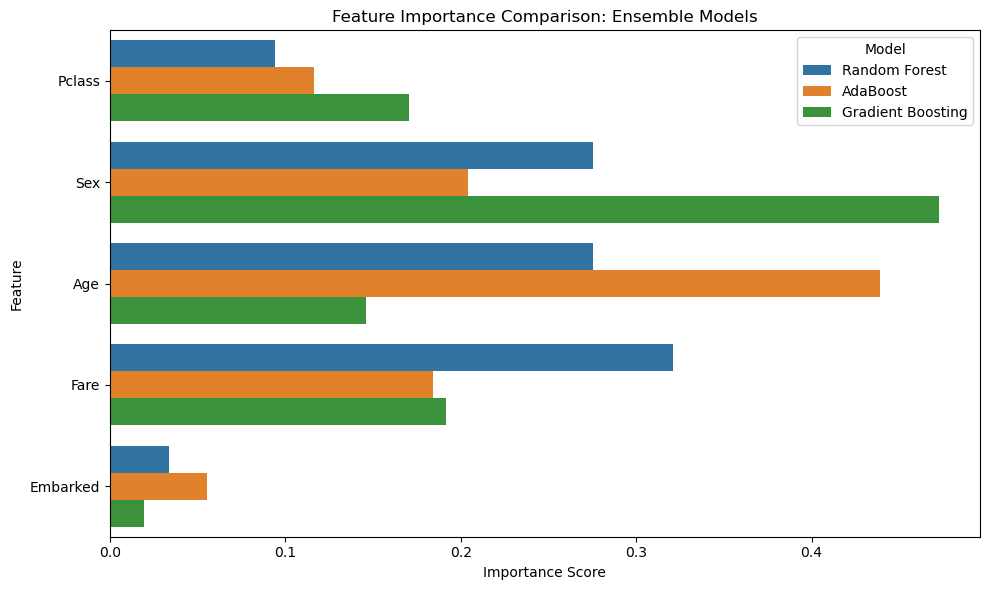

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Step 1: Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Step 2: Select important features and the target
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
df = df[features + ['Survived']]

# Step 3: Clean missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Step 4: Encode categorical features numerically
for col in ['Sex', 'Embarked']:
    df[col] = LabelEncoder().fit_transform(df[col])

# Step 5: Define feature matrix and target
X = df[features]
y = df['Survived']

# Step 6: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Initialize ensemble classifiers
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Step 8: Collect feature importance from each model
importance_df = pd.DataFrame()
for name, model in models.items():
    model.fit(X_train, y_train)
    # Get importance scores
    importances = model.feature_importances_
    # Create temporary dataframe
    temp = pd.DataFrame({
        'Feature': features,
        'Importance': importances,
        'Model': name
    })
    # Append to global importance dataframe
    importance_df = pd.concat([importance_df, temp], ignore_index=True)

# Step 9: Plot comparison of feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', hue='Model')
plt.title("Feature Importance Comparison: Ensemble Models")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
# plt.savefig("feature_importance_comparison.png")
plt.show()